# IPL Statistics(2008-2020)

IPL is one of the most entertaining and popular league around the world played during the summer season(April-Mid of May).
The league has grown with immense fan-base and entertainment.The data-set contains the data of Indian premier league(IPL) from 2008 to 2020 which has completed 13 seasons under various sponsors. The data contains every match detail with the umpires stood, man of match awardee, runs margin, result, winner, toss winner and also it contains the ball by ball detail in ball data set which has data for every ball bowled and every run scored.

#### AIM : 
To perform cleaning and handling of data and draw the required inferences from them. 

#### Tools: 
Libraries : numpy, pandas, matplotlib, seaborn 

#### Source : 

https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020

You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

#### From the Course: 

The Course is really awesome. The practical aspects are really good. I learned technical aspects alot. The practice, the exercises, the assignments will help the one to do the work at ease. The questions at the end of every lecture will revise the topics. It really helped me, I revised the topics with the questions below. I have done the assignments and exercises comfortably. Thanks to Jovian team, for gathering the tools and explaining them very well and also for the platform they provided. The platform is really amazing.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - add some explanation here

> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imnskc
Your Kaggle Key: ········


100%|██████████| 1.37M/1.37M [00:00<00:00, 88.1MB/s]

The dataset has been downloaded and extracted.

In [101]:
# Change this
data_dir = './ipl-complete-dataset-20082020'

In [102]:
import os
os.listdir(data_dir)

['IPL Matches 2008-2020.csv', 'IPL Ball-by-Ball 2008-2020.csv']

Let us save and upload our work to Jovian before continuing.

In [103]:
project_name = "ipl-statistics" # change this (use lowercase letters and hyphens only)

In [104]:
!pip install jovian --upgrade -q

In [105]:
import jovian

In [106]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kishkath/ipl-statistics" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kishkath/ipl-statistics


'https://jovian.ai/kishkath/ipl-statistics'

## Data Preparation and Cleaning

**Explanation**

In this Part, we will perform some cleaning of data and prepare the data to conclude our queries with respective graphs.

- Reading the data.
- we will remove Null values if present in the column.
- we will drop columns with null values if the column isn't necessary for our inferences.
- we will modify duplicate values to unique values either by changing the name or replacing every duplicate with unique name.
- Dropping rows if Null values are more in the row.
- If data value is invalid better to drop it.
- Merging various columns to obtain graphical representation.
- Grouping by some conditions.
- Sorting by columns.
- Filling Null values with appropriate value.
- Checking unique values of column.
- Using bar plot to view graphically.
- knowing the shape of data, which will conclude the number of rows and columns.

Note: Null values includes Nan, missing values,?,[],etc.

Note: 
- As I want to learn to perform different techniques to remove Null values, I haven't dropped any column containing the null values even they are not necessary for our inferences.
- If needed one can drop them.

### Libraries : 

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
### Reading the data using Pandas
matches_df = pd.read_csv("ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv")
matches_data = matches_df.copy()

ball_df = pd.read_csv("ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv")
ball_data = ball_df.copy()

matches_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


### Initally,Performing Cleaning operations on matches_data set 

In [216]:
### Knowing the shape of dataset which will conclude no.of rows and columns
matches_df.shape

(816, 17)

Matches data has 816 rows and 17 columns

In [217]:
### Knowing the names of columns in the data
matches_df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [218]:
### Knowing the brief information of every column in the data
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i


Firstly, there are 14 object data-types and 2 integer data-types and 1 float data-types

In [219]:
### Describing the data with range of values, quartiles, mean, standard data of numeric_values.
matches_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,816.0,756349.553922,305894.254804,335982.0,501227.75,729298.0,1082626.25,1237181.0
neutral_venue,816.0,0.094363,0.292512,0.0,0.00,0.0,0.00,1.0
result_margin,799.0,17.321652,22.068427,1.0,6.00,8.0,19.50,146.0


In [220]:
### Checking if any null values are present in each column.

In [221]:
matches_df.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

There are nan values in columns: city(13), player_of_match(4), result(4), winner(4), result_margin(17), eliminator(4), method(797)

In [222]:
### Just to know unique values of data, we will take all columns containing Null values as a dataset.

nan_columns = matches_df[matches_df.columns[matches_df.isnull().any()]]
nan_columns.head()

,city,player_of_match,winner,result,result_margin,eliminator,method
0,Bangalore,BB McCullum,Kolkata Knight Riders,runs,140.0,N,NaN
1,Chandigarh,MEK Hussey,Chennai Super Kings,runs,33.0,N,NaN
2,Delhi,MF Maharoof,Delhi Daredevils,wickets,9.0,N,NaN
3,Mumbai,MV Boucher,Royal Challengers Bangalore,wickets,5.0,N,NaN
4,Kolkata,DJ Hussey,Kolkata Knight Riders,wickets,5.0,N,NaN


In [223]:
### Below are the unique values of columns containing null values.

In [224]:
nan_columns.method.unique()  # [nan, 'D/L']
nan_columns.eliminator.unique() # 'N', 'Y', 'nan'
nan_columns.result.unique() #'runs', 'wickets', 'tie', nan
nan_columns.winner.unique() # ['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils','Royal Challengers Bangalore', 'Rajasthan Royals'
#'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
#'Pune Warriors', 'Kochi Tuskers Kerala', nan,
#'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
#'Rising Pune Supergiant', 'Delhi Capitals']

nan_columns.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

#### Handling city Column

In [225]:
### Displaying the columns with null values.
matches_df[matches_df.city.isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


In [226]:
## as we can see, the matches played in UAE are not named for cities. (only dubai and sharjah)
## so, we can fill them with appropriate cities taking names from venues.

In [227]:
## So to fill city column, as venue names are same as city, we can replace city with venue name. 
## so there by modifying names we can fill city column.

matches_df["city"].fillna(matches_df["venue"],inplace=True)

matches_df["city"] = ["Dubai" if x=='Dubai International Cricket Stadium' else x for x in matches_df.city]
matches_df["city"] = ["Sharjah" if x=='Sharjah Cricket Stadium' else x for x in matches_df.city]

matches_df.city.isna().sum()
matches_df.isna().sum()

id                   0
city                 0
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

### Method used:

Hence, we have filled them with appropriate venue names and no nan values are left in city column.

#### Handling result column

In [228]:
### Knowing the unique values of result column
matches_df.result.unique()

array(['runs', 'wickets', 'tie', nan], dtype=object)

- As result column are of 4 categories as 'runs','wickets','tie',nan.
- Here nan will show the games with No-Result.
- So, it is better to change nan values with "NR".

In [229]:
### Displaying rows with null columns.
matches_df[matches_df.result.isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [230]:
### Filling the null values of result column with 'NR(No-Result)' value
matches_df.result.fillna('NR',inplace=True)
#matches_df.loc[241,:]
matches_df[matches_df["result"]=="NR"]
#matches_df.isna().sum()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NR,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NR,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NR,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NR,NaN,NaN,NaN,UV Gandhe,NJ Llong


### Method Used: 

Hence, using fillna we have filled nan values of result column with NR.
    

In [231]:
### Checking the null values of updated data.
matches_df.isna().sum()

id                   0
city                 0
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               0
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

#### Handling result_margin

In [232]:
### Displaying rows of data containing null values
matches_df[matches_df.result_margin.isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NR,NaN,NaN,NaN,SS Hazare,RJ Tucker
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NR,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NR,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney





- As by the result, we can observe there are total of 17 nan values in result_margin column.
- We can observe that result_margin column values are nan only when result is either tie or NR(No-result has acquired to the game)
- So, we can replace nan values of result_margin column which has result "tie" with (0.) and nan values of result_margin column which has result "NRM(No-Result Margin)" with (NR)
      
   

In [233]:
### Knowing the unique values of result_margin
matches_df.result_margin.unique()

array([140.,  33.,   9.,   5.,   6.,   3.,  66.,   7.,  10.,   4.,  13.,
        45.,   8.,  29.,  18.,  23.,  41.,  12.,  65.,  25.,   1.,  14.,
       105.,  19.,  75.,  92.,  11.,  24.,  nan,  27.,  38.,  78.,  16.,
        53.,   2.,  31.,  55.,  98.,  34.,  36.,  39.,  17.,  40.,  67.,
        63.,  37.,  57.,  35.,  22.,  21.,  48.,  26.,  20.,  85.,  32.,
        76., 111.,  82.,  43.,  58.,  28.,  74.,  42.,  59.,  46.,  47.,
        86.,  44.,  87., 130.,  15.,  60.,  77.,  30.,  50.,  93.,  72.,
        62.,  97., 138.,  71., 144.,  80.,  51.,  61., 146.,  64., 102.,
       118.,  49.,  88.,  69.])

In [234]:
### Filling the null values of result_margin column with values of result for further replacing.
matches_df.result_margin.fillna(matches_df.result,inplace=True)
#matches_df[matches_df.result_margin.isna()]

### performing suitable operations
matches_df["result_margin"] = ["0." if x=="tie" else x for x in matches_df.result_margin]
matches_df["result_margin"] = ["NRM" if x=="NR" else x for x in matches_df.result_margin]
matches_df.result_margin.isna().sum()

matches_df[matches_df.result =="NR"]
#matches_df[matches_df.result=="tie"]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NR,NRM,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NR,NRM,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NR,NRM,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NR,NRM,NaN,NaN,UV Gandhe,NJ Llong


In [235]:
### Checking total null values of entire result_margin column
matches_df.result_margin.isna().sum()

0

In [236]:
### knowing unique values of matches data
matches_df.result_margin.unique()

array([140.0, 33.0, 9.0, 5.0, 6.0, 3.0, 66.0, 7.0, 10.0, 4.0, 13.0, 45.0,
       8.0, 29.0, 18.0, 23.0, 41.0, 12.0, 65.0, 25.0, 1.0, 14.0, 105.0,
       19.0, 75.0, 92.0, 11.0, 24.0, '0.', 27.0, 38.0, 78.0, 16.0, 53.0,
       2.0, 31.0, 55.0, 98.0, 34.0, 36.0, 39.0, 17.0, 40.0, 67.0, 63.0,
       37.0, 57.0, 35.0, 22.0, 21.0, 48.0, 26.0, 20.0, 85.0, 32.0, 76.0,
       111.0, 82.0, 'NRM', 43.0, 58.0, 28.0, 74.0, 42.0, 59.0, 46.0, 47.0,
       86.0, 44.0, 87.0, 130.0, 15.0, 60.0, 77.0, 30.0, 50.0, 93.0, 72.0,
       62.0, 97.0, 138.0, 71.0, 144.0, 80.0, 51.0, 61.0, 146.0, 64.0,
       102.0, 118.0, 49.0, 88.0, 69.0], dtype=object)

### Method Used:

Hence, we have replaced values with appropriate equivalent values based on result column.

In [237]:
### Checking total null values of all columns of updated data
matches_df.isna().sum()

id                   0
city                 0
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               0
result_margin        0
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64


#### Handling method column

In [238]:
### Knowing unique values of method column
matches_df.method.unique()

array([nan, 'D/L'], dtype=object)

In [239]:
### Displaying rows of dataset containing null values in method column

matches_df[matches_df.method.isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,0.,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [240]:
### Filling the Null values in method column with 'No Method' value
matches_df.method.fillna("No Method",inplace=True)
matches_df.method.unique()

array(['No Method', 'D/L'], dtype=object)

In [241]:
### displaying number of null values present in method column
matches_df.method.isna().sum()

0

### Method Used:

Hence, the nan values are changed to No Method as there was no method used in the match.

In [242]:
### Displaying number of null values in every column of dataset.
matches_df.isna().sum()

id                 0
city               0
date               0
player_of_match    4
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             4
result             0
result_margin      0
eliminator         4
method             0
umpire1            0
umpire2            0
dtype: int64

#### Handling winner column

In [243]:
### knowing the unique values of winner column
matches_df.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [244]:
### we can see the winners, and we can observe that there exists duplicate names for the franchises.
### we need to set it unique

In [245]:
matches_df["winner"] = ["Rising Pune Supergiants" if x in ["Rising Pune Supergiants","Rising Pune Supergiant"] else x for x in matches_df.winner]
matches_df.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Delhi Capitals'], dtype=object)

In [246]:
### Displaying the rows of dataset which has null values in winner column.
matches_df[matches_df["winner"].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NR,NRM,NaN,No Method,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NR,NRM,NaN,No Method,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NR,NRM,NaN,No Method,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NR,NRM,NaN,No Method,UV Gandhe,NJ Llong


- As we can observe, winner values are NaN when there is NR(No-Result).
- So by this, match hasn't happened.
- We can change the NaN values of winner with NW(No-winner).

In [247]:
### Filling the null values of winner column with 'NW(No-winner)' as match didn't happen.
matches_df.winner.fillna("NW",inplace=True)
matches_df.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'NW',
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Delhi Capitals'], dtype=object)

In [248]:
### Displaying entire sum of null values present in winner column
matches_df.winner.isna().sum()

0

### Method Used:

Hence, we have filled NaN values with NW(No-Winner as match isnt happened)

In [249]:
### Displaying sum of null values in each column of dataset.
matches_df.isna().sum()

id                 0
city               0
date               0
player_of_match    4
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         4
method             0
umpire1            0
umpire2            0
dtype: int64

#### Handling player_of_match

In [250]:
### Knowing the unique values of player_of_match column.
matches_df.player_of_match.unique()

array(['BB McCullum', 'MEK Hussey', 'MF Maharoof', 'MV Boucher',
       'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden', 'YK Pathan',
       'KC Sangakkara', 'JDP Oram', 'AC Gilchrist', 'SM Katich',
       'MS Dhoni', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'R Vinay Kumar', 'IK Pathan', 'SM Pollock',
       'Sohail Tanvir', 'S Sreesanth', 'A Nehra', 'SC Ganguly',
       'CRD Fernando', 'L Balaji', 'Shoaib Akhtar', 'A Mishra',
       'DPMD Jayawardene', 'GC Smith', 'DJ Bravo', 'M Ntini',
       'SP Goswami', 'A Kumble', 'KD Karthik', 'JA Morkel', 'P Kumar',
       'Umar Gul', 'SK Raina', 'SR Tendulkar', 'R Dravid', 'DL Vettori',
       'RP Singh', 'M Muralitharan', 'CH Gayle', 'AB de Villiers',
       'RS Bopara', 'PP Ojha', 'TM Dilshan', 'HH Gibbs', 'DP Nannes',
       'JP Duminy', 'Yuvraj Singh', 'SB Jakati', 'JH Kallis', 'G Gambhir',
       'RG Sharma', 'A Singh', 'S Badrinath', 'DR Smith', 'LRPL Taylor',
       'Harbhajan Singh', 'R Bhatia', 'SK Warne', 'B

In [251]:
### Displaying the rows containing null values in player_of_match column
matches_df[matches_df.player_of_match.isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NW,NR,NRM,NaN,No Method,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NW,NR,NRM,NaN,No Method,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NW,NR,NRM,NaN,No Method,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NW,NR,NRM,NaN,No Method,UV Gandhe,NJ Llong


- As we can observe, the player_of_match column value is NaN because the match hasn't happened.
- So by this, we can no player had played.
- We can replace NaN with NP("No-Player")

In [252]:
### Filling the null values of player_of_match column with 'NP(No-player)' value as match didn't happen to decide the awardee
matches_df.player_of_match.fillna("NP",inplace=True)
matches_df.player_of_match.isna().sum()

0

### Method Used: 

Hence, we have filled NaN values in the column with NP(No-Player as no match has happened)

In [253]:
### Displaying sum of null values of every column of dataset
matches_df.isna().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         4
method             0
umpire1            0
umpire2            0
dtype: int64

#### Handling eliminator 

In [254]:
### Knowing the unique values of eliminator column
matches_df.eliminator.unique()

array(['N', 'Y', nan], dtype=object)

In [255]:
### Displaying rows of data containing null values in eliminator column.
matches_df[matches_df.eliminator.isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NP,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NW,NR,NRM,NaN,No Method,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NP,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NW,NR,NRM,NaN,No Method,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NP,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NW,NR,NRM,NaN,No Method,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NP,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NW,NR,NRM,NaN,No Method,UV Gandhe,NJ Llong


In [256]:
### Displaying the values of column and their count in the column
matches_df.eliminator.value_counts()

N    799
Y     13
Name: eliminator, dtype: int64

- We can observe from the data that ipl data set is between 2008-2020 which have completed total 13 seasons.
- So by this, we can know there are 13(Y) eliminator matches and 799(N) non-eliminator matches. 
- We can come to a conclusion that 13 seasons have 13 eliminator matches and remaining are non-eliminator because each season has only one eliminator match.
- We can replace NaN values of eliminator column to N(not a eliminator match)

In [257]:
### Filling the null values of eliminator column with "N" as specified the reason above.
matches_df.eliminator.fillna("N",inplace=True)
matches_df.eliminator.value_counts()

N    803
Y     13
Name: eliminator, dtype: int64

### Method Used: 

Hence, we have filled NaN values with N as the 13 eliminator matches have already taken in count.

In [258]:
### Displaying sum of null values in entire column of eliminator
matches_df.eliminator.isna().sum()

0

In [259]:
### Displaying sum of null values of each column in the dataset.
matches_df.isna().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [260]:
### Displaying the first five rows of dataset.
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,No Method,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,No Method,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,No Method,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,No Method,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,No Method,BF Bowden,K Hariharan


Hence, we can see no nan values are present in dataset.

### Holla!!! 

In [261]:
## Now, we can check for other columns whether the values contain duplicates or not excluding the cleaned part above.

## Date can be excluded because two matches might happen on same day and also it doesn't contain any nan values.

## Handling columns by checking duplicates

### Handling Venue column 

As this column doesn't have null values we will check if any duplicates exist

In [262]:
### displaying unique values of venue column
matches_df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [263]:
### Displaying values of venue column and their count.
matches_df.venue.value_counts()

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
M.Chinnaswamy Stadium                                   15
Kingsmead                                               

- We can observe the duplicate names exists for M.Chinna swamy Stadium and M chinnaswamy stadium. 
- Also, for Punjab Cricket Association Is Bindra Stadium and Punjab Cricket Association Stadium.

In [264]:
### Modifyingvenue column by replacing duplicates 
matches_df.venue = ["M Chinnaswamy stadium" if x in ["M Chinnaswamy Stadium","M.Chinnaswamy Stadium"] else x for x in matches_df.venue]
matches_df.venue = ["Punjab Cricket Association Stadium,Mohali" if x in ["Punjab Cricket Association Stadium, Mohali","Punjab Cricket Association IS Bindra Stadium, Mohali"] else x for x in matches_df.venue]
matches_df.venue.value_counts()

M Chinnaswamy stadium                                  80
Eden Gardens                                           77
Feroz Shah Kotla                                       74
Wankhede Stadium                                       73
Rajiv Gandhi International Stadium, Uppal              64
MA Chidambaram Stadium, Chepauk                        57
Punjab Cricket Association Stadium,Mohali              56
Sawai Mansingh Stadium                                 47
Dubai International Cricket Stadium                    33
Sheikh Zayed Stadium                                   29
Maharashtra Cricket Association Stadium                21
Sharjah Cricket Stadium                                18
Dr DY Patil Sports Academy                             17
Subrata Roy Sahara Stadium                             17
Kingsmead                                              15
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    13
Sardar Patel Stadium, Motera                           12
SuperSport Par

### Handling toss_winner column

In [312]:
### Displaying the values of toss_winner column with their count of appearances.
matches_df.toss_winner.value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

In [267]:
### Replacing Duplicate
matches_df.toss_winner = ["Rising Pune Supergiants" if x=="Rising Pune Supergaints" else x for x in matches_df.toss_winner]
matches_df.toss_winner.value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

### Handling team1 and team2 columns

In [269]:
matches_df.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [270]:
matches_df.team1 = ["Rising Pune Supergiants" if x=="Rising Pune Supergiant" else x for x in matches_df.team1]
matches_df.team2 = ["Rising Pune Supergiants" if x=='Rising Pune Supergiant' else x for x in matches_df.team2]
matches_df.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Delhi Capitals'],
      dtype=object)

In [313]:
import jovian

In [314]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kishkath/ipl-statistics" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kishkath/ipl-statistics


'https://jovian.ai/kishkath/ipl-statistics'

## Exploratory Analysis and Visualization

**Explanation**

- Analyzing the numeric columns.
- Plotting graphs to draw inferences from them.
- Performing aggregation tasks to group up the columns or finding sum or mean of columns.
- Visualizing the graph and drawing clear information from them.


Note : 

I used only bar chart for making conclusions on my queries.

**Queries** to draw from Visualisation:

1. Find out the team with most number of wins and less number of wins?
2. Find out the teams with maximum winning the toss and minimum winning the toss.
3. Find out the umpires who stood most number of times and less number of times.
4. Find out the team with most wins when they won toss and team with most wins when they lost toss?
5. Player with Maximum player_of_match awards and player with player_of_match awards more than 10 times.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [315]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Using Numeric datatype columns

In [274]:
matches_df.dtypes

id                  int64
city               object
date               object
player_of_match    object
venue              object
neutral_venue       int64
team1              object
team2              object
toss_winner        object
toss_decision      object
winner             object
result             object
result_margin      object
eliminator         object
method             object
umpire1            object
umpire2            object
dtype: object

In [275]:
### Displaying the dataset.
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,No Method,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium,Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,No Method,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,No Method,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,No Method,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,No Method,BF Bowden,K Hariharan


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

###  Ques No.(1)

Find out the team with most number of wins and less number of wins?

In [276]:
### Displaying the count of winner column with their count.
winners = matches_df.winner.value_counts()
winners.columns=["Team","count"]
winners


Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
NW                               4
Name: winner, dtype: int64

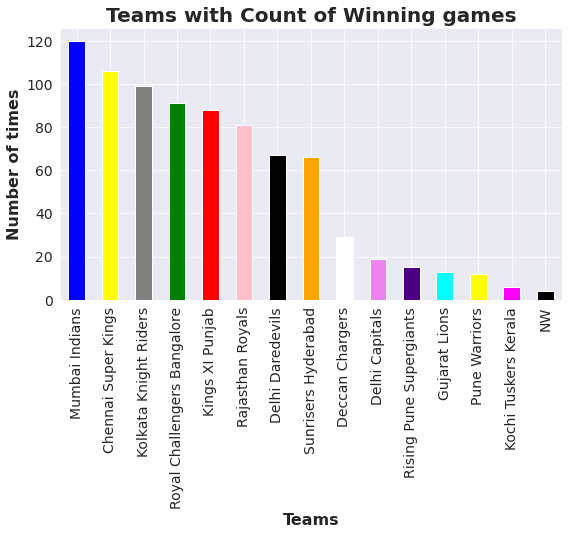

In [277]:
### plotting the bar graph 
### Providing different color to different teams which will be ease to identify them.
### Labelling x-axis and y-axis with appropriate name

c = ["blue","yellow","Grey","Green","Red","Pink","black","Orange","white","Violet","Indigo","cyan","yellow","magenta","Black"]
matches_df['winner'].value_counts().plot(kind='bar',color=c)
plt.title("Teams with Count of Winning games",fontsize=20,weight="bold")
plt.xlabel("Teams",fontsize=16,weight="bold")
plt.ylabel("Number of times",fontsize=16,weight="bold")
plt.show()

### Inference : 

We can conclude that Mumbai Indians have won maximum number of matches(120) and Kochi Tuskers Kerala have won less number of matches(6)

### Ques No.(2)

Find out the teams with maximum winning the toss and minimum winning the toss.

In [316]:
### Displaying the values of toss_winner column with their counts


matches_df.toss_winner.value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

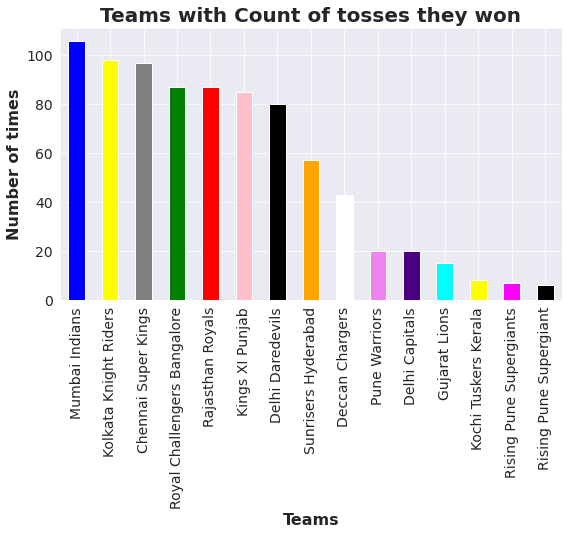

In [317]:
### Making different colors to different teams.
### Labelling x-axis and y-axis

c = ["blue","yellow","Grey","Green","Red","Pink","black","Orange","white","Violet","Indigo","cyan","yellow","magenta","Black"]

matches_df.toss_winner.value_counts().plot(kind='bar',color=c)
plt.title("Teams with Count of tosses they won",fontsize=20,weight="bold")
plt.xlabel("Teams",fontsize=16,weight="bold")
plt.ylabel("Number of times",fontsize=16,weight="bold")
plt.show()

Hence, we can conclude Mumbai Indians(106) won maximum number of tosses and Kochi minimum number of tosses(8)

### Ques No.(3) 

Find out the umpires who stood most number of times and less number of times

In [318]:
### Copying the data so that original dataset doesn't modify by modifying the copied data.
### Adding the new column to copied data


matches_copydf = matches_df.copy()

matches_copydf["season"] = pd.DatetimeIndex(matches_df["date"]).year
season_matches = matches_copydf.groupby(["season"])['id'].count()
#season_matches

matches_copydf


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,No Method,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium,Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,No Method,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,No Method,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,No Method,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,No Method,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,0.,Y,No Method,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,No Method,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,No Method,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,No Method,PR Reiffel,S Ravi,2020


In [319]:
### Displaying count of umpire columns(1 & 2) with their count of values.
matches_df.umpire1.value_counts()

HDPK Dharmasena          78
AK Chaudhary             56
Asad Rauf                51
M Erasmus                40
Aleem Dar                38
BF Bowden                37
S Ravi                   37
BR Doctrove              34
CB Gaffaney              34
KN Ananthapadmanabhan    33
AY Dandekar              28
C Shamshuddin            22
NJ Llong                 21
Nitin Menon              20
RE Koertzen              20
S Asnani                 19
VA Kulkarni              19
BNJ Oxenford             16
JD Cloete                16
YC Barde                 14
A Nand Kishore           14
BG Jerling               13
RK Illingworth           13
SS Hazare                11
S Das                    10
MR Benson                10
K Hariharan              10
DJ Harper                 9
UV Gandhe                 8
CK Nandan                 8
IL Howell                 7
GAV Baxter                7
RM Deshpande              7
SJ Davis                  6
VK Sharma                 6
SD Fry              

In [283]:
matches_df.umpire2.value_counts()

S Ravi             84
C Shamshuddin      60
SJA Taufel         54
CK Nandan          49
RJ Tucker          41
Nitin Menon        37
BNJ Oxenford       32
VA Kulkarni        31
AK Chaudhary       31
RB Tiffin          30
SK Tarapore        26
M Erasmus          25
AM Saheba          23
RE Koertzen        21
VK Sharma          20
PR Reiffel         19
DJ Harper          18
RK Illingworth     18
HDPK Dharmasena    16
NJ Llong           16
CB Gaffaney        13
SL Shastri         13
K Srinath          13
K Hariharan        11
A Nand Kishore     11
S Asnani           11
BR Doctrove         8
PG Pathak           7
A Deshmukh          7
IL Howell           7
K Srinivasan        6
AL Hill             6
SS Hazare           6
I Shivram           6
GA Pratapkumar      6
S Das               5
TH Wijewardene      5
YC Barde            5
BG Jerling          4
AV Jayaprakash      4
IJ Gould            3
SD Ranade           2
MR Benson           2
Subroto Das         1
JD Cloete           1
SJ Davis  

In [320]:
### concatening two columns of umpire1 and umpire2 for entire count of umpires
umpires = pd.concat([matches_df.umpire1,matches_df.umpire2])
umpires.value_counts()

S Ravi                   121
HDPK Dharmasena           94
AK Chaudhary              87
C Shamshuddin             82
M Erasmus                 65
CK Nandan                 57
Nitin Menon               57
SJA Taufel                55
Asad Rauf                 51
VA Kulkarni               50
BNJ Oxenford              48
CB Gaffaney               47
RJ Tucker                 46
BR Doctrove               42
RE Koertzen               41
Aleem Dar                 38
BF Bowden                 37
NJ Llong                  37
KN Ananthapadmanabhan     33
RK Illingworth            31
SK Tarapore               31
RB Tiffin                 30
S Asnani                  30
AY Dandekar               28
DJ Harper                 27
AM Saheba                 26
VK Sharma                 26
A Nand Kishore            25
PR Reiffel                24
K Hariharan               21
YC Barde                  19
SS Hazare                 17
BG Jerling                17
JD Cloete                 17
K Srinath     

S Ravi has stood most number of times(121) and SubrotoDas stood less number of times(1) as umpires.

#### Ques No.(5):

Player with Maximum player_of_match awards and player with player_of_match awards more than 10 times.

In [321]:
### Displaying  dataset
matches_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,No Method,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium,Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,No Method,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,No Method,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,No Method,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,No Method,BF Bowden,K Hariharan


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [325]:
### Displaying players of awardee and the no.of times they won it.
matches_df.player_of_match.value_counts()[:]

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 234, dtype: int64

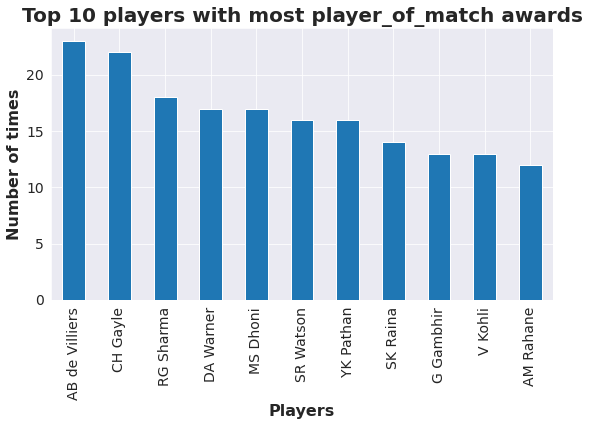

In [326]:
### Plotting the graph with top 10 player_of_match awards and no.of times they won it.
matches_df.player_of_match.value_counts()[:11].plot(kind='bar')

plt.title("Top 10 players with most player_of_match awards",fontsize=20,weight="bold")
plt.xlabel("Players",fontsize=16,weight="bold")
plt.ylabel("Number of times",fontsize=16,weight="bold")
plt.show()

AB de Villiers have won maximum player_of_match awards

In [327]:
### Displaying no.of players won award more than 10 times.
a=matches_df["player_of_match"].value_counts()>10
a.value_counts()

False    217
True      17
Name: player_of_match, dtype: int64

17 Players have won player_of_match awards more than 10times.

### Ques No.(4) : 

Find out the team with most wins when they won toss and team with most wins when they lost toss?

In [332]:
### Displaying the data in which the winner and toss_winner of match are equal
matches_df.winner[matches_df["toss_winner"]==matches_df["winner"]].value_counts()

Chennai Super Kings            61
Mumbai Indians                 61
Kolkata Knight Riders          55
Rajasthan Royals               44
Royal Challengers Bangalore    43
Kings XI Punjab                36
Delhi Daredevils               35
Sunrisers Hyderabad            29
Deccan Chargers                19
Gujarat Lions                  10
Delhi Capitals                 10
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

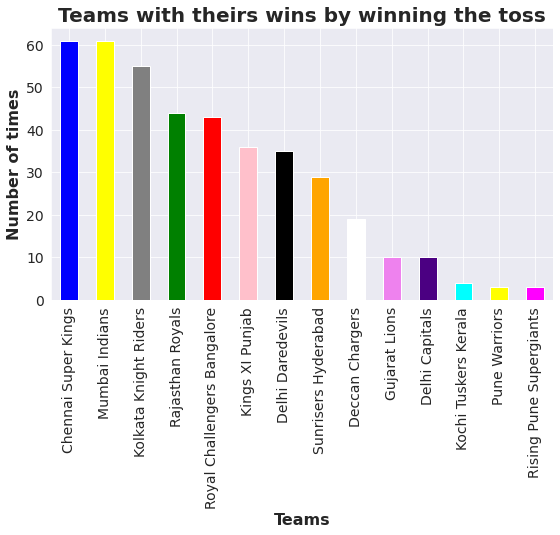

In [331]:
### Plotting the graph which has same winner and toss_winner
c = ["blue","yellow","Grey","Green","Red","Pink","black","Orange","white","Violet","Indigo","cyan","yellow","magenta","Black"]

matches_df.winner[matches_df["toss_winner"]==matches_df["winner"]].value_counts().plot(kind='bar',color=c)
plt.title("Teams with theirs wins by winning the toss",fontsize=20,weight="bold")
plt.xlabel("Teams",fontsize=16,weight="bold")
plt.ylabel("Number of times",fontsize=16,weight="bold")
plt.show()

Chennai Super Kings and Mumbai Indians won 61 matches also by winning the toss.

In [329]:
### Displaying the data in which the winner and toss_winner of match are not equal
matches_df.winner[matches_df["toss_winner"]!=matches_df["winner"]].value_counts()

Mumbai Indians                 59
Kings XI Punjab                52
Royal Challengers Bangalore    48
Chennai Super Kings            45
Kolkata Knight Riders          44
Rajasthan Royals               37
Sunrisers Hyderabad            37
Delhi Daredevils               32
Rising Pune Supergiants        12
Deccan Chargers                10
Pune Warriors                   9
Delhi Capitals                  9
NW                              4
Gujarat Lions                   3
Kochi Tuskers Kerala            2
Name: winner, dtype: int64

Mumbai Indians won 59 matches by losing the toss.

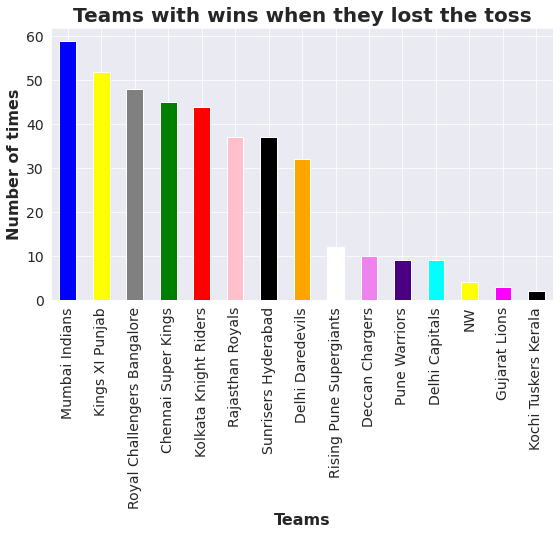

In [330]:
### Plotting the graph which has different winner and toss_winner
c = ["blue","yellow","Grey","Green","Red","Pink","black","Orange","white","Violet","Indigo","cyan","yellow","magenta","Black"]

matches_df.winner[matches_df['toss_winner']!=matches_df["winner"]].value_counts().plot(kind='bar',color=c)
plt.title("Teams with wins when they lost the toss",fontsize=20,weight="bold")
plt.xlabel("Teams",fontsize=16,weight="bold")
plt.ylabel("Number of times",fontsize=16,weight="bold")
plt.show()


Let us save and upload our work to Jovian before continuing

In [333]:
import jovian

In [334]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kishkath/ipl-statistics" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kishkath/ipl-statistics


'https://jovian.ai/kishkath/ipl-statistics'

## Asking and Answering Questions

**Explanation** 

- pandas module is used to perform cleaning,grouping,replacing,filling and checking the query which we have put in.
- numpy module is used to perform operations on arrays, such as performing mathematical operations.
- Seaborn module is used for plotting graphs

**Questions:**

1. How Many matches played each season?
2. which team has won with highest result margin?
3. Find out every season champions?
4. Find out total number of matches played by each team?
5. Find out Top 3 teams with high win percentage?

#### Q1: TODO - ask a question here and answer it below

How Many matches played each season?

In [295]:
matches_copydf

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,No Method,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium,Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,No Method,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,No Method,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,No Method,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,No Method,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,0.,Y,No Method,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,No Method,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,No Method,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,No Method,PR Reiffel,S Ravi,2020


In [296]:
matches_copydf.groupby(["season"])['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: id, dtype: int64

#### Q2: TODO - ask a question here and answer it below

which team has won with highest result margin?

In [297]:
#matches_df[["winner","result_margin"]].sort_values("result_margin",ascending=False)
matches_df.result_margin.unique()

matches_copiedf = matches_df.result_margin.replace('NRM',0.)
matches_copiedf = pd.to_numeric(matches_copiedf)

m = pd.DataFrame(matches_df.winner,matches_copiedf)
m.reset_index()
m.sort_values("result_margin",ascending=False)

,winner
result_margin,
146.0,Chennai Super Kings
144.0,Kolkata Knight Riders
140.0,Delhi Daredevils
138.0,Rajasthan Royals
130.0,Kings XI Punjab
...,...
0.0,Kolkata Knight Riders
0.0,Kolkata Knight Riders
0.0,Kolkata Knight Riders


Chennai Super Kings won with highest result_margin of 146.0runs

#### Q3: TODO - ask a question here and answer it below

Find out every season champions?

In [298]:
every_winner=matches_copydf[["winner","season"]]
every_winner

,winner,season
0,Kolkata Knight Riders,2008
1,Chennai Super Kings,2008
2,Delhi Daredevils,2008
3,Royal Challengers Bangalore,2008
4,Kolkata Knight Riders,2008
...,...,...
811,Royal Challengers Bangalore,2020
812,Mumbai Indians,2020
813,Sunrisers Hyderabad,2020
814,Delhi Capitals,2020


In [299]:
season0_index = every_winner[every_winner['season']==2008].iloc[-1]
display(season0_index)
season1_index=every_winner[every_winner['season']==2009].iloc[-1]
display(season1_index)
season2_index=every_winner[every_winner['season']==2010].iloc[-1]
display(season2_index)
season3_index=every_winner[every_winner['season']==2011].iloc[-1]
display(season3_index)
season4_index=every_winner[every_winner['season']==2012].iloc[-1]
display(season4_index)
season5_index=every_winner[every_winner['season']==2013].iloc[-1]
display(season5_index)
season6_index=every_winner[every_winner['season']==2014].iloc[-1]
display(season6_index)
season7_index=every_winner[every_winner['season']==2015].iloc[-1]
display(season7_index)
season8_index=every_winner[every_winner['season']==2016].iloc[-1]
display(season8_index)
season9_index=every_winner[every_winner['season']==2017].iloc[-1]
display(season9_index)
season10_index=every_winner[every_winner['season']==2018].iloc[-1]
display(season10_index)
season11_index=every_winner[every_winner['season']==2019].iloc[-1]
display(season11_index)
season12_index=every_winner[every_winner['season']==2020].iloc[-1]
display(season12_index)


winner    Rajasthan Royals
season                2008
Name: 57, dtype: object

winner    Deccan Chargers
season               2009
Name: 114, dtype: object

winner    Chennai Super Kings
season                   2010
Name: 174, dtype: object

winner    Chennai Super Kings
season                   2011
Name: 247, dtype: object

winner    Kolkata Knight Riders
season                     2012
Name: 321, dtype: object

winner    Mumbai Indians
season              2013
Name: 397, dtype: object

winner    Kolkata Knight Riders
season                     2014
Name: 457, dtype: object

winner    Mumbai Indians
season              2015
Name: 516, dtype: object

winner    Sunrisers Hyderabad
season                   2016
Name: 576, dtype: object

winner    Mumbai Indians
season              2017
Name: 635, dtype: object

winner    Chennai Super Kings
season                   2018
Name: 695, dtype: object

winner    Mumbai Indians
season              2019
Name: 755, dtype: object

winner    Mumbai Indians
season              2020
Name: 815, dtype: object

- As we can observe winner is obtained at the last match of season.
- So there by we can conclude the last winner of season is title winner.

- By taking the last index of season we can print the winner

In [300]:
display("Season 1 Winners are {0}".format(every_winner.iloc[57,:1][0]))
display("Season 2 Winners are {0}".format(every_winner.iloc[114,:1][0]))
display("Season 3 Winners are {0}".format(every_winner.iloc[174,:1][0]))
display("Season 4 Winners are {0}".format(every_winner.iloc[247,:1][0]))
display("Season 5 Winners are {0}".format(every_winner.iloc[321,:1][0]))
display("Season 6 Winners are {0}".format(every_winner.iloc[397,:1][0]))
display("Season 7 Winners are {0}".format(every_winner.iloc[457,:1][0]))
display("Season 8 Winners are {0}".format(every_winner.iloc[516,:1][0]))
display("Season 9 Winners are {0}".format(every_winner.iloc[576,:1][0]))
display("Season 10 Winners are {0}".format(every_winner.iloc[635,:1][0]))
display("Season 11 Winners are {0}".format(every_winner.iloc[695,:1][0]))
display("Season 12 Winners are {0}".format(every_winner.iloc[755,:1][0]))
display("Season 13 Winners are {0}".format(every_winner.iloc[815,:1][0]))

'Season 1 Winners are Rajasthan Royals'

'Season 2 Winners are Deccan Chargers'

'Season 3 Winners are Chennai Super Kings'

'Season 4 Winners are Chennai Super Kings'

'Season 5 Winners are Kolkata Knight Riders'

'Season 6 Winners are Mumbai Indians'

'Season 7 Winners are Kolkata Knight Riders'

'Season 8 Winners are Mumbai Indians'

'Season 9 Winners are Sunrisers Hyderabad'

'Season 10 Winners are Mumbai Indians'

'Season 11 Winners are Chennai Super Kings'

'Season 12 Winners are Mumbai Indians'

'Season 13 Winners are Mumbai Indians'

#### Q4: TODO - ask a question here and answer it below

Find out total number of matches played by each team?

In [301]:
team = pd.concat([matches_df.team1,matches_df.team2])
team=team.value_counts().reset_index()
team.columns = ["Team","No. of Matches Played"]
team

,Team,No. of Matches Played
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,161
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


Hence, we can confirm Mumbai Indians have played 203 matches in the entire tournament and Kochi Tuskers Keral played least matches(14)

#### Q5: TODO - ask a question here and answer it below

Find out Top 3 teams with high win percentage?

In [302]:
team

,Team,No. of Matches Played
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,161
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


In [303]:
winn = matches_df.winner.value_counts().reset_index()
winn.columns = ["Team","No.of wins"]

teams = team.merge(winn,left_on='Team',right_on='Team',how='inner')
#teams.drop(["No. of Wins","wins"],inplace=True,axis=1)
teams

,Team,No. of Matches Played,No.of wins
0,Mumbai Indians,203,120
1,Royal Challengers Bangalore,195,91
2,Kolkata Knight Riders,192,99
3,Kings XI Punjab,190,88
4,Chennai Super Kings,178,106
5,Delhi Daredevils,161,67
6,Rajasthan Royals,161,81
7,Sunrisers Hyderabad,124,66
8,Deccan Chargers,75,29
9,Pune Warriors,46,12


In [304]:
teams["Win%"] = round(100*(teams["No.of wins"]/teams["No. of Matches Played"]),2)
teams.sort_values('Win%',ascending=False)

,Team,No. of Matches Played,No.of wins,Win%
4,Chennai Super Kings,178,106,59.55
0,Mumbai Indians,203,120,59.11
10,Delhi Capitals,33,19,57.58
7,Sunrisers Hyderabad,124,66,53.23
2,Kolkata Knight Riders,192,99,51.56
6,Rajasthan Royals,161,81,50.31
12,Rising Pune Supergiants,30,15,50.00
1,Royal Challengers Bangalore,195,91,46.67
3,Kings XI Punjab,190,88,46.32
11,Gujarat Lions,30,13,43.33


We can confirm that

1. Chennai Super Kings (59.55%)
2. Mumbai Indians (59.11)
3. Delhi Capitals (57.58) are the top3 teams with good win percentage

Let us save and upload our work to Jovian before continuing.

In [335]:
import jovian

In [336]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kishkath/ipl-statistics" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kishkath/ipl-statistics


'https://jovian.ai/kishkath/ipl-statistics'

## Inferences and Conclusion

**Explanation**

I have drawn all required inferences from the match dataset. Every team detail, every season winner atmost everything has been taken out via graphs or results. 

Note: 

If needed, we can drop neutral_venue column if we do not use it for any inference.
(In my process neutral_value column is not necessary, for future conclusions I haven't dropped it)



In [337]:
import jovian

In [338]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kishkath/ipl-statistics" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kishkath/ipl-statistics


'https://jovian.ai/kishkath/ipl-statistics'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

**Future Work** :

I will also explore the ball-by-ball dataset of IPL data and perform all cleaning and preparation similar to this dataset. 
Also I will try to merge the both datasets and draw many other inferences from them.

**References** : 

- pandas : https://www.geeksforgeeks.org/pandas-tutorial/
- bar_charts :https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/
- kaggle : https://www.kaggle.com/saiswaroop018/ipl-data-analysis-and-visualization-project#11

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [309]:
import jovian

In [310]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kishkath/ipl-statistics" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kishkath/ipl-statistics


'https://jovian.ai/kishkath/ipl-statistics'